In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 8
import obspy_arraytools

# Introduction to Array Seismology Methods

 #### 1. Seismograms, move-out
 #### 2. Vespagrams, linear and 4th root
 #### 3. Phase Weighted Stack (PWS)
 #### 4. Array Response Function
 #### 5. Slowness-Backazimuth plots
 #### 6. Frequency-Wavenumaber analysis

This practical introduces the most common array processing techniques used for array seismology studies. 
We will introduce standard techniques and use them on selected examples from an event recorded at the German Regional Seismic Network (GRSN) and a recently deployed array in Morocco (Muenster Morocco array, MM) and teleseismic events.


           



   #### Information for each event
<table>
       <tr>
        <th>#</th> <th>date</th> <th>time</th> <th>lat</th> <th>lon</th> <th>depth(km)</th> <th>magn</th> <th>array</th> <th>phase</th>
        </tr>
        <tr>
            <td>1</td> <td>17 DEC 1991</td> <td>06:38:17</td> <td>47.429</td> <td>151.484</td> <td>150</td> <td>5.5</td> <td>GRF,GRSN</td>     <td>P, PcP</td>
        </tr>
        <tr>
            <td>2</td> <td>14 AUG 2012</td> <td>02:59:38</td> <td>49.80</td> <td>145.064</td> <td>583</td> <td>7.7</td> <td>MM</td>     <td>P, PP</td>
        </tr>
        <tr>
            <td>3</td> <td>14 AUG 2012</td> <td>02:59:38</td> <td>49.80</td> <td>145.064</td> <td>583</td> <td>7.7</td> <td>YKA</td>     <td>diff, PP</td>
        </tr>
        <tr>
            <td>4</td> <td>05 MAY 2003</td> <td>23:04:45</td> <td>3.645</td> <td>128.010</td> <td>61</td> <td>6.2</td> <td>KNET</td>     <td>mislo, pP</td>
        </tr>
        <tr>
            <td>5</td> <td>04 OCT 2002</td> <td>19:05:50</td> <td>-20.96</td> <td>-178.86</td> <td>630</td> <td>6.3</td> <td>EAGLE</td>     <td>scattering</td>
           </tr>
        <tr>
        
</table>        
Please keep in mind that the **data** are **accesible** at **/home/mess/Desktop/data**.

For example for the Morocco event: /home/mess/Desktop/data/02_MM/02.mseed

### **Getting Genral information of each event and array

**a)** Plot the morocco event (14 AUG 2012) on a world map (using QuakeML file)


In [14]:
# Load waveforms only once
from obspy import *
from obspy.clients.fdsn import Client

cl = Client("http://jane")
start = UTCDateTime("2022-04-09T06:57:10")
end = start + 20
st = cl.get_waveforms(network="BW",station="SYB*",location="",channel="EL*",starttime=start,endtime=end)
#st += cl.get_waveforms(network="BW",station="SYBAD",location="",channel="HH*",starttime=start,endtime=end)
inv = cl.get_stations(network="BW",station="SYB*",location="",channel="*",starttime=start,endtime=end,level="response")


In [7]:
%matplotlib inline
from obspy_arraytools import SeismicArray

st.attach_response(inv)
st.remove_response(water_level=10)

vertical_components = st.select(component="Z")


In [ ]:
import obspy.geodetics as geodetics
res_stat = geodetics.gps2dist_azimuth(float(62.499),float(-114.678),
                                                float(49.80),float(145.064))
print(res_stat)

In [8]:
d = SeismicArray('', inv) 
d.inventory_cull(vertical_components)
print(vertical_components)

5 Trace(s) in Stream:
BW.SYB01..ELZ | 2022-02-09T05:51:30.000000Z - 2022-02-09T05:51:40.000000Z | 200.0 Hz, 2001 samples
BW.SYB02..ELZ | 2022-02-09T05:51:29.999999Z - 2022-02-09T05:51:39.999999Z | 200.0 Hz, 2001 samples
BW.SYB03..ELZ | 2022-02-09T05:51:29.999999Z - 2022-02-09T05:51:39.999999Z | 200.0 Hz, 2001 samples
BW.SYBAD..HHZ | 2022-02-09T05:51:30.000000Z - 2022-02-09T05:51:40.000000Z | 200.0 Hz, 2001 samples
BW.SYBOB..ELZ | 2022-02-09T05:51:29.999999Z - 2022-02-09T05:51:39.999999Z | 200.0 Hz, 2001 samples


Center of Gravity:
{'latitude': 48.120399999999997, 'longitude': 11.568323600000001, 'absolute_height_in_km': 0.48032000000000002}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
Total time in routine: 46.670628

2022-02-09T05:51:30.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:30.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:30.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


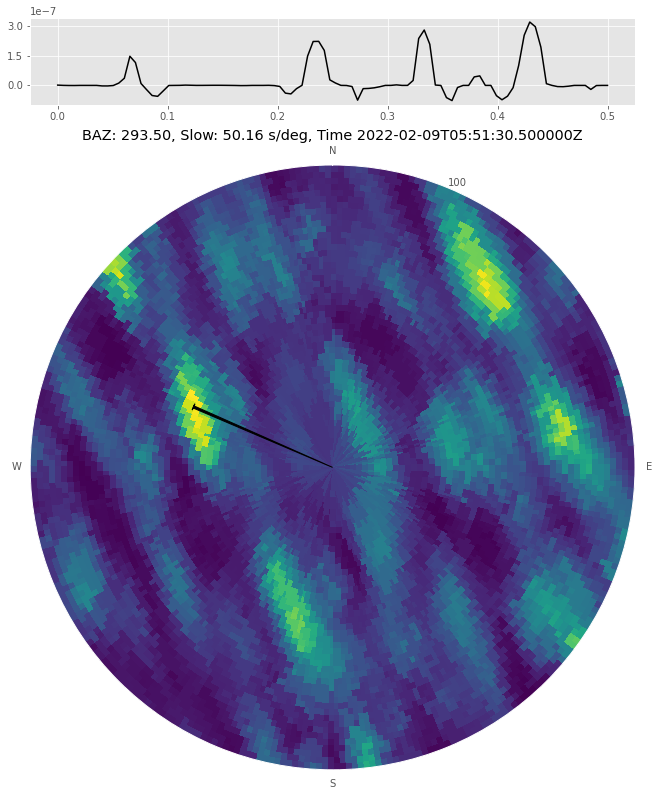

2022-02-09T05:51:30.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


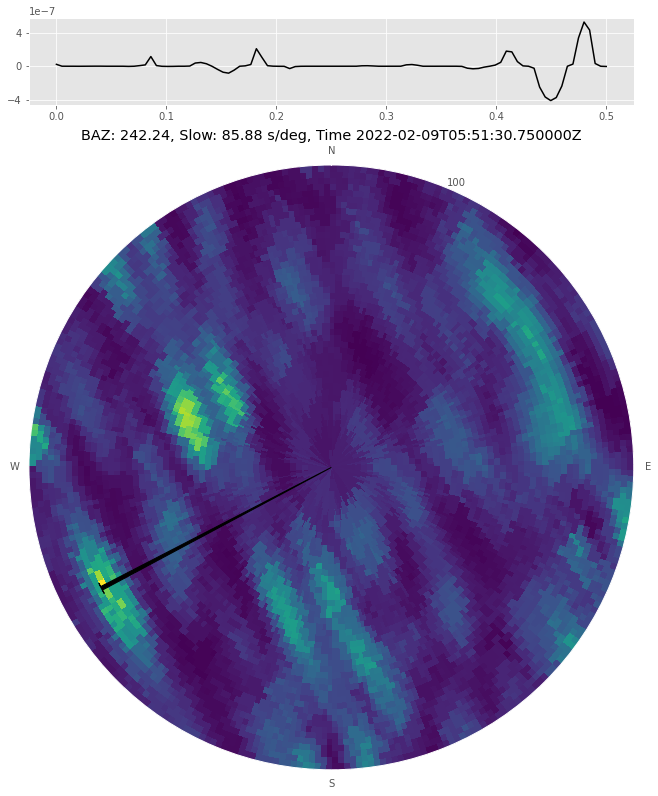

2022-02-09T05:51:31.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


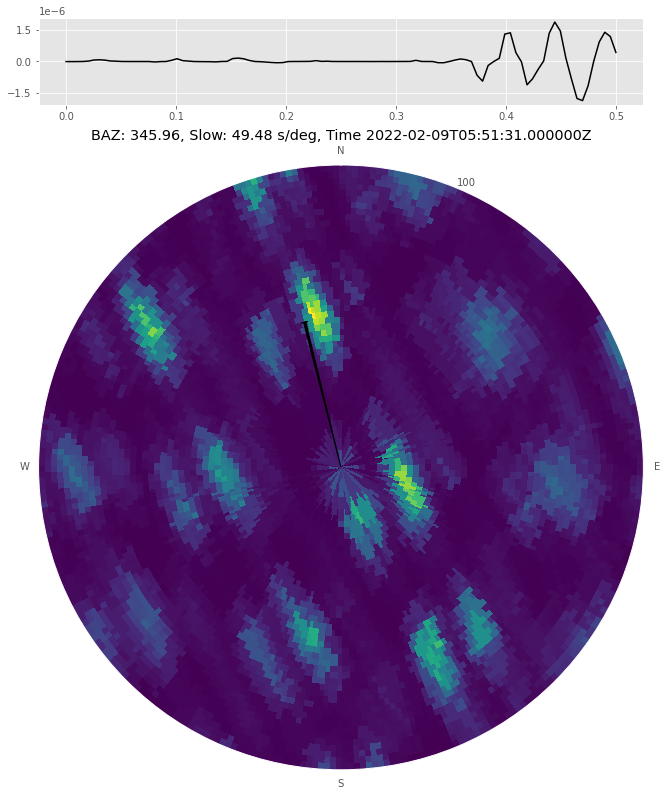

2022-02-09T05:51:31.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


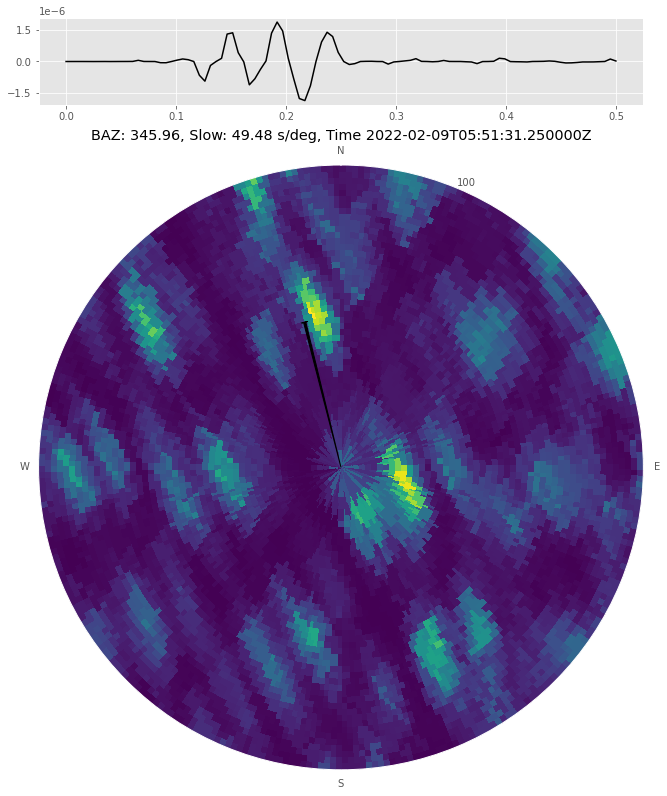

2022-02-09T05:51:31.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


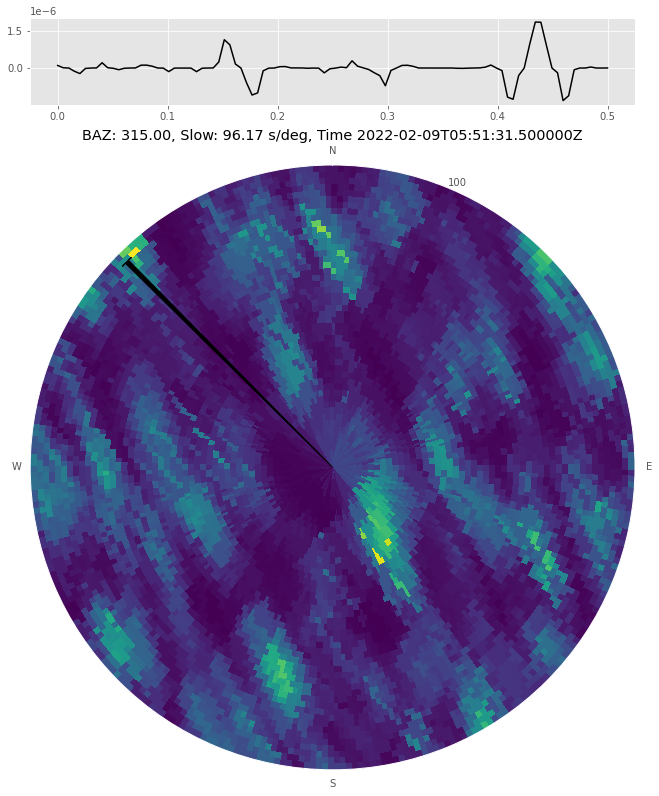

2022-02-09T05:51:31.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


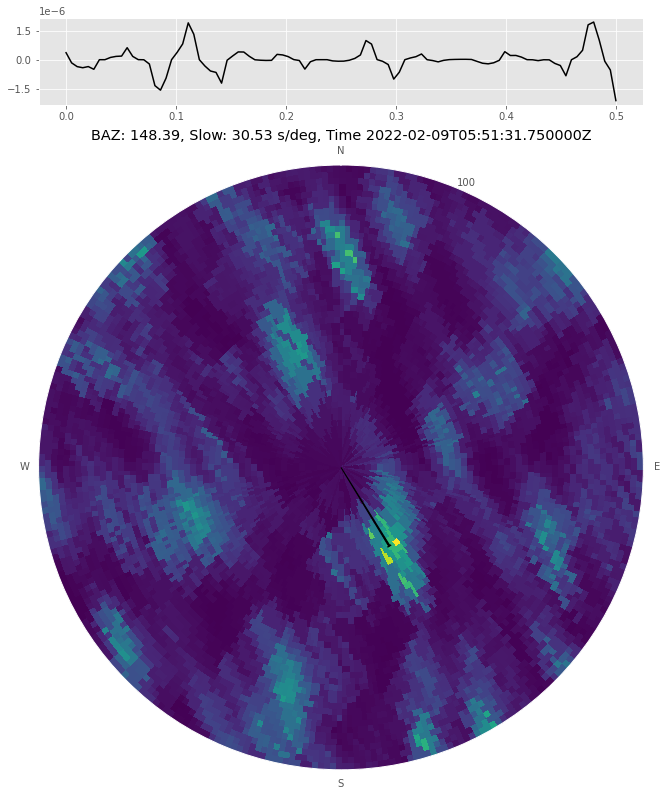

2022-02-09T05:51:32.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


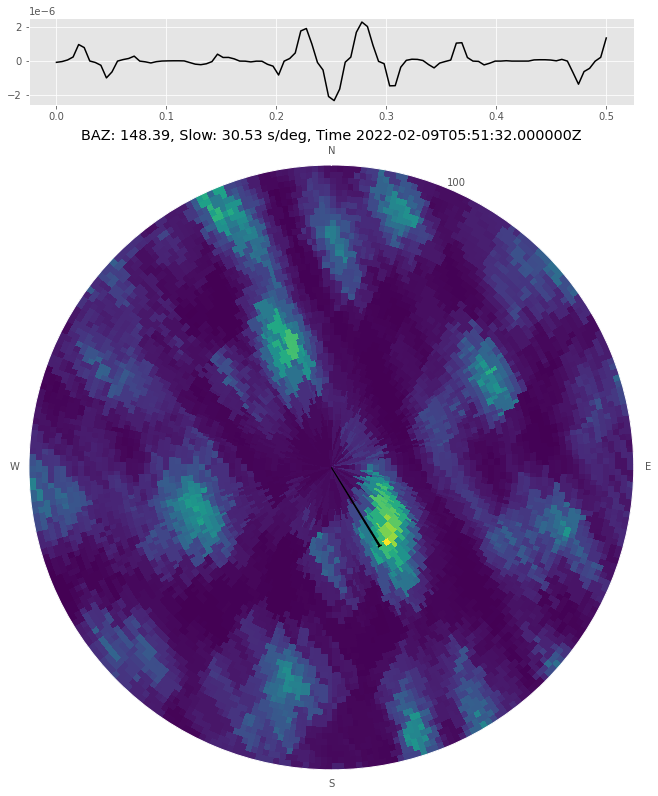

2022-02-09T05:51:32.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


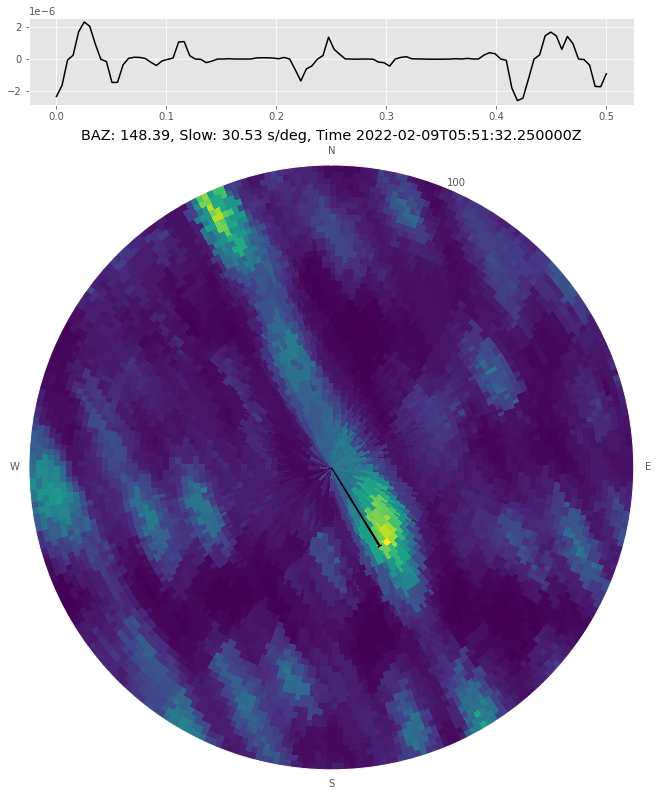

2022-02-09T05:51:32.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


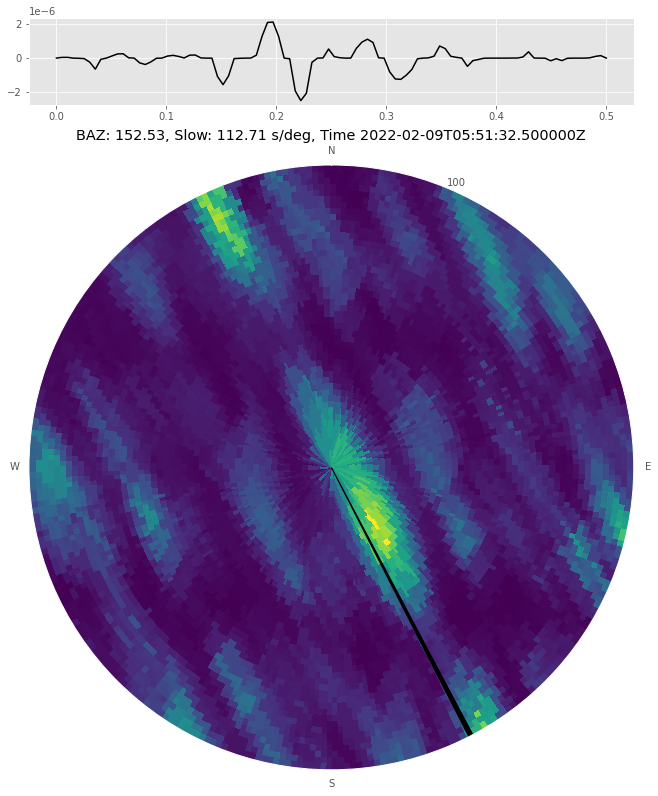

2022-02-09T05:51:32.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


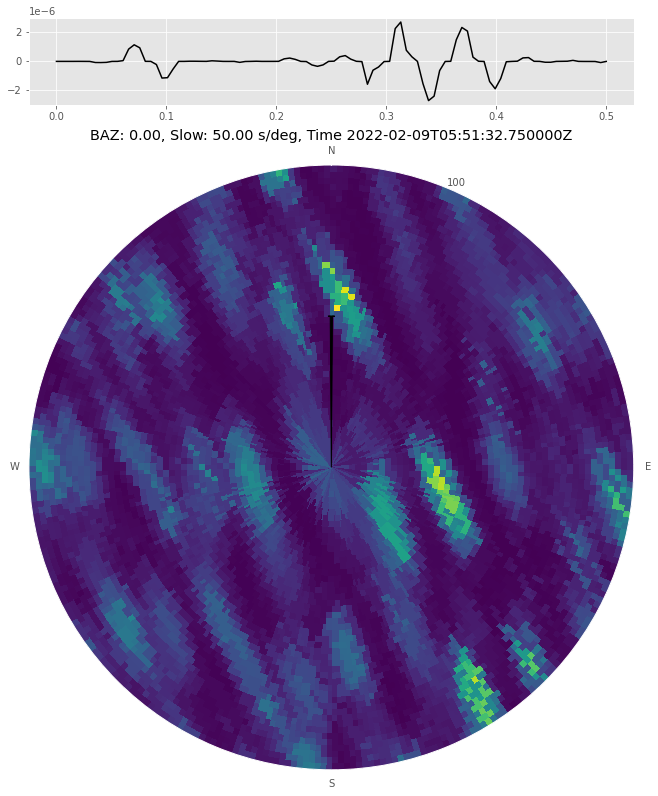

2022-02-09T05:51:33.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:33.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:33.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


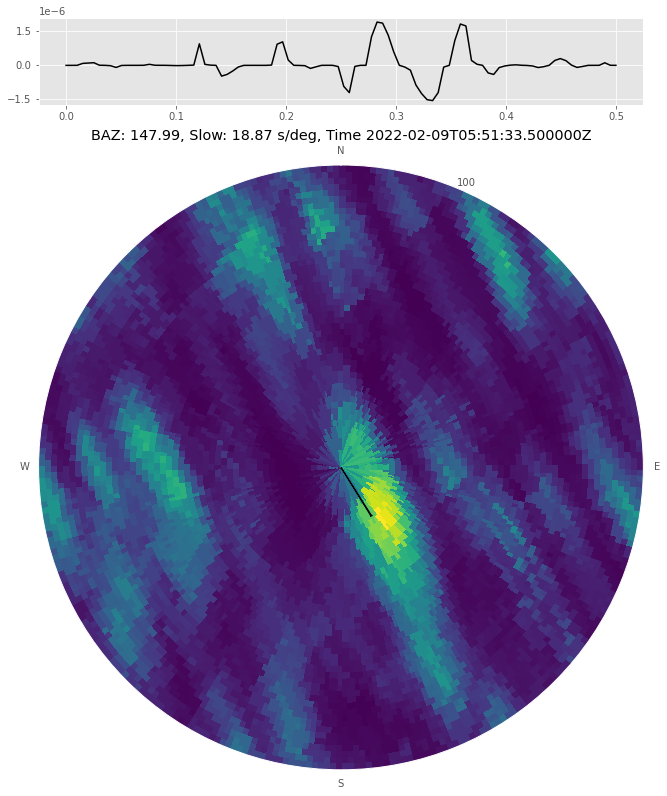

2022-02-09T05:51:33.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:34.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:34.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


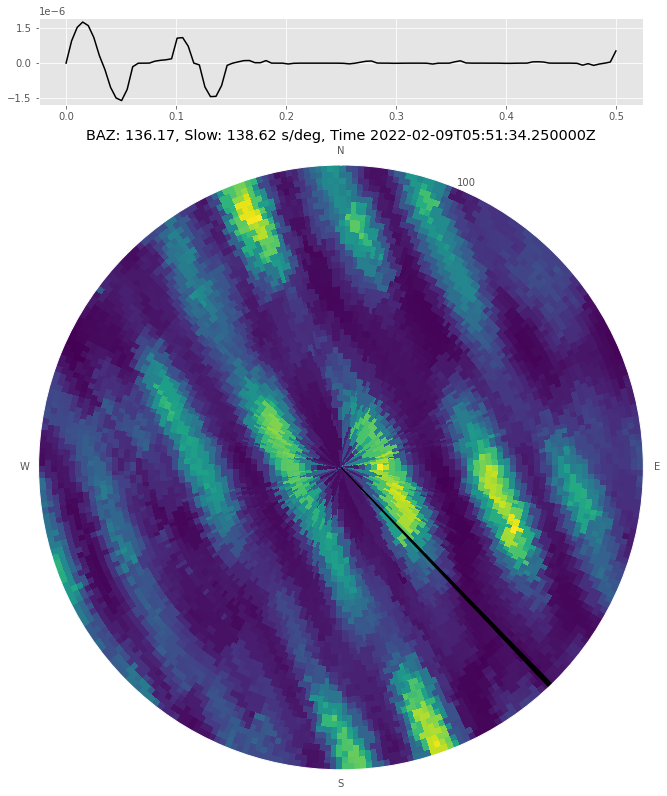

2022-02-09T05:51:34.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


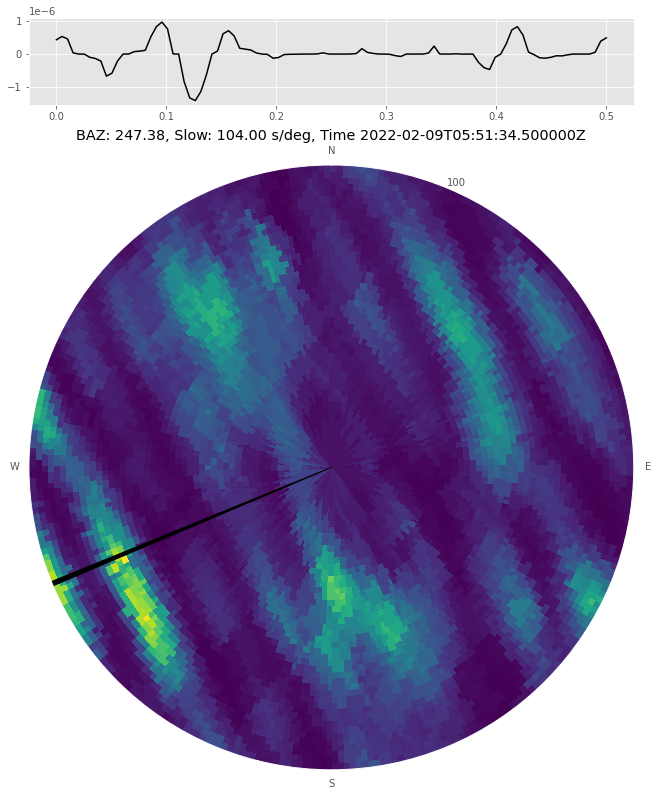

2022-02-09T05:51:34.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


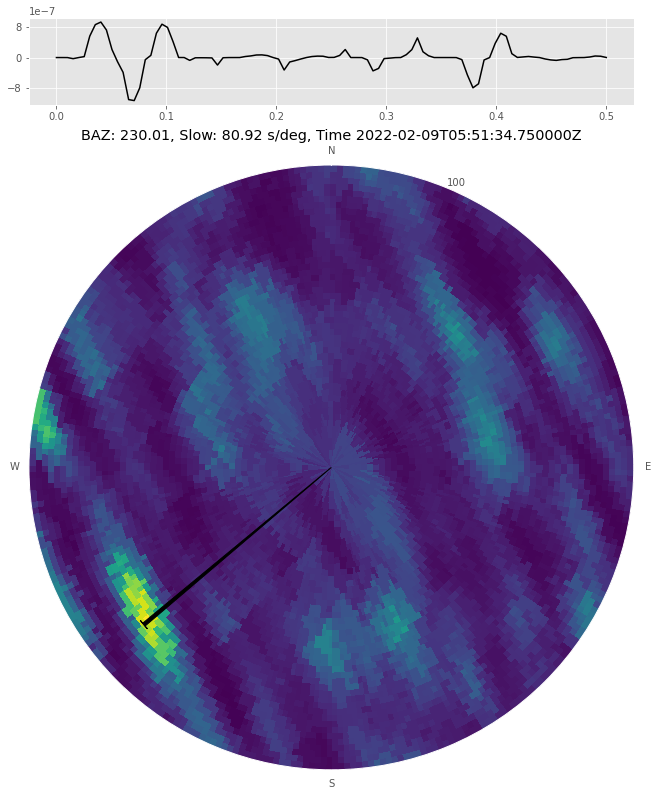

2022-02-09T05:51:35.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


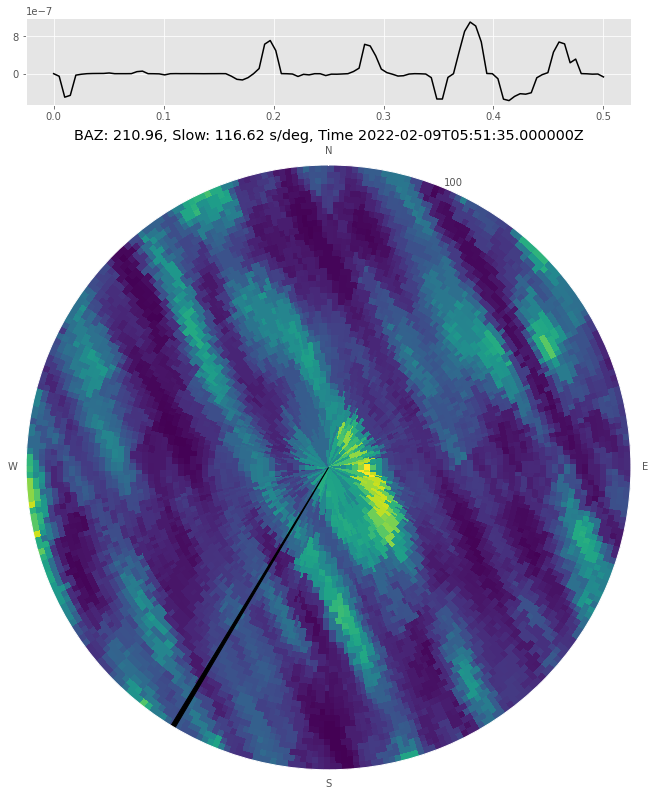

2022-02-09T05:51:35.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


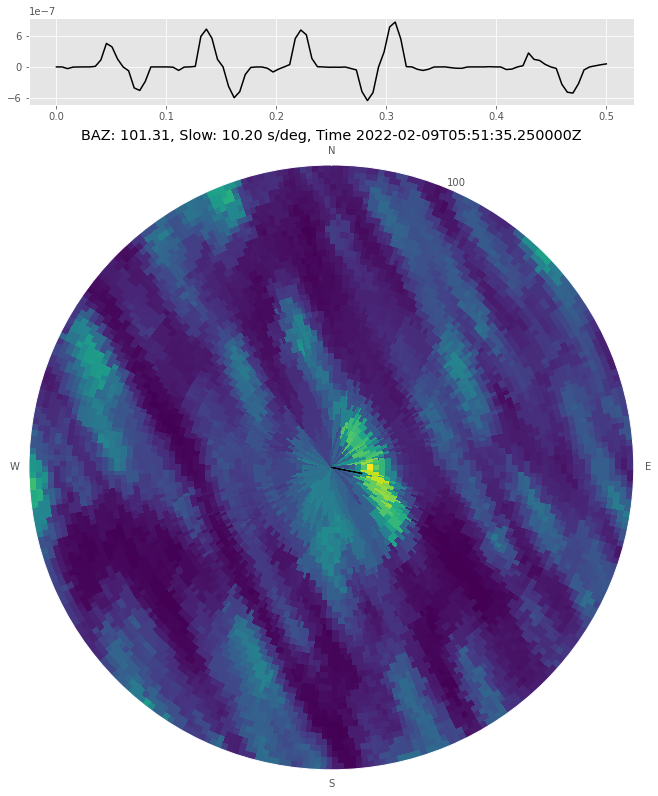

2022-02-09T05:51:35.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


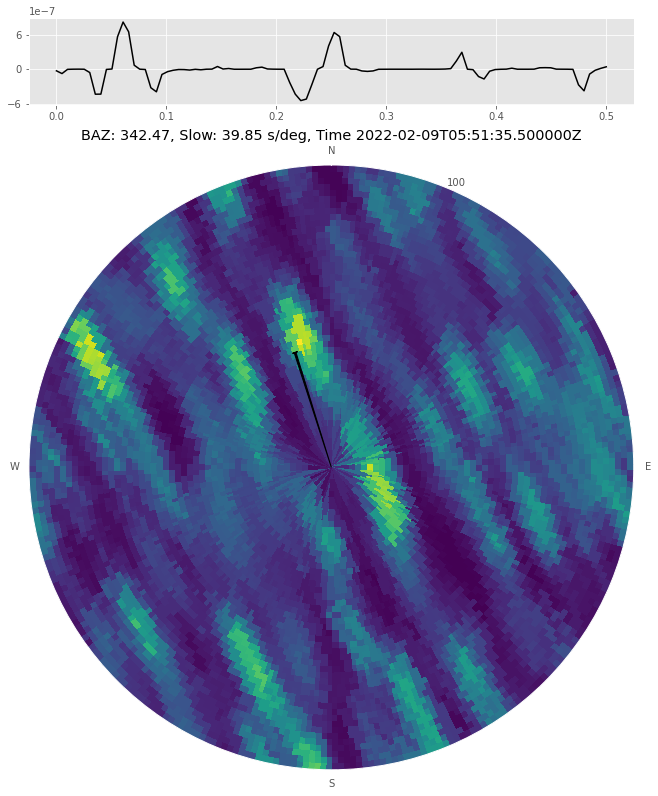

2022-02-09T05:51:35.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


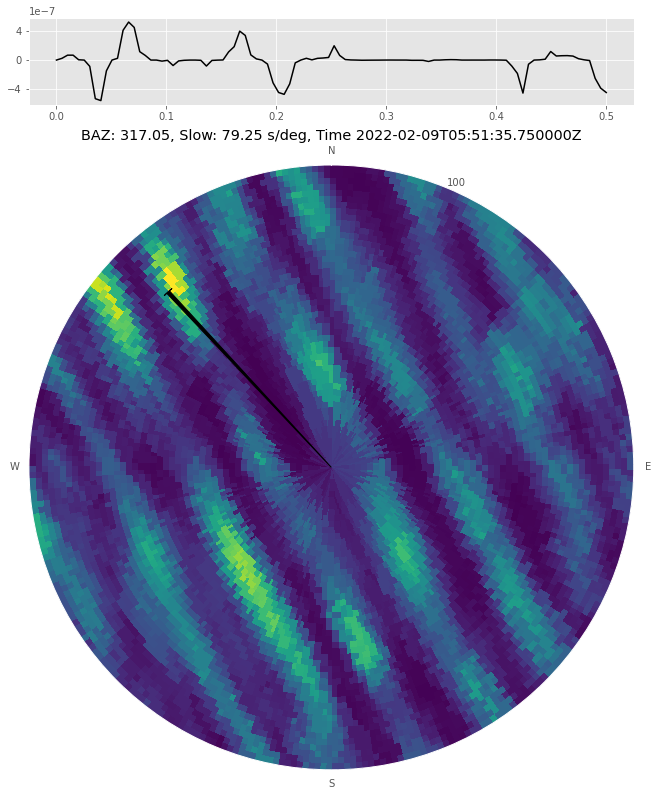

2022-02-09T05:51:36.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


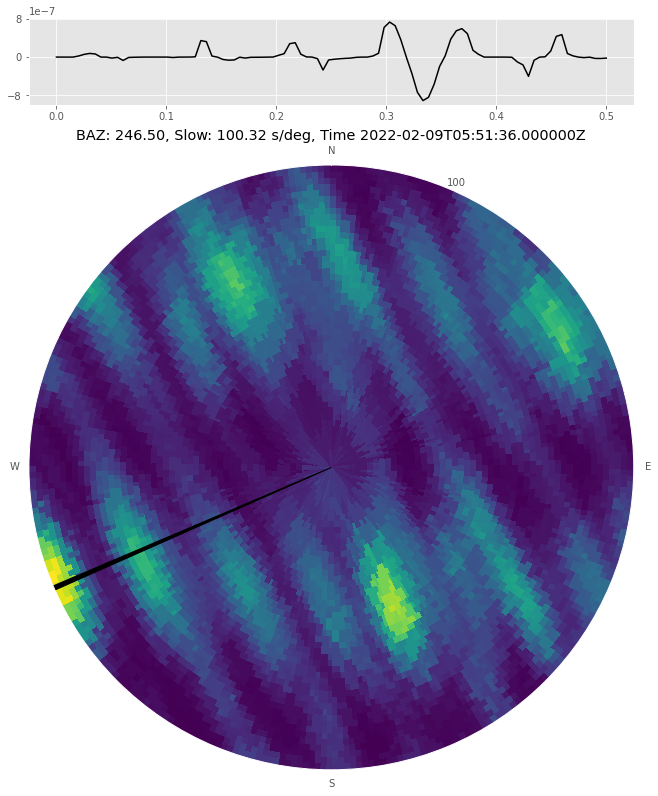

2022-02-09T05:51:36.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


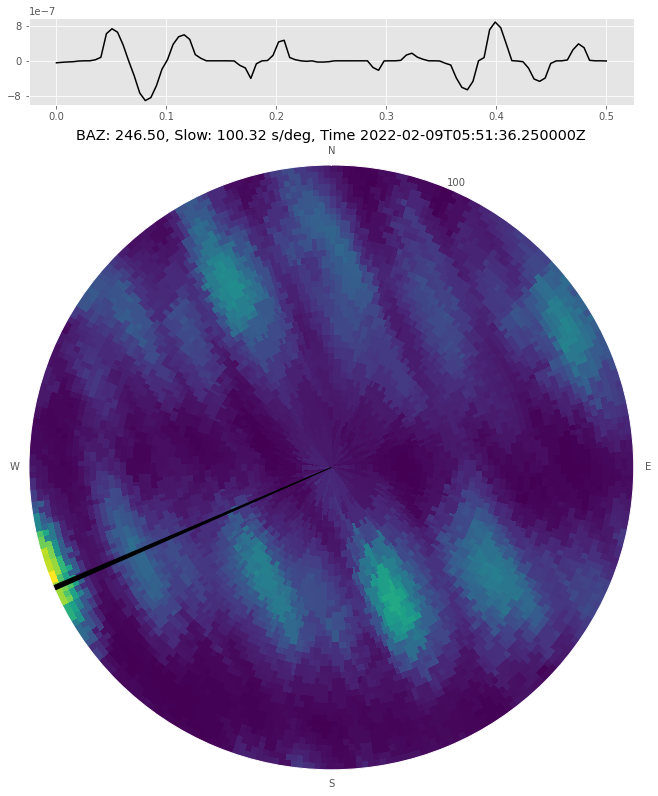

2022-02-09T05:51:36.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


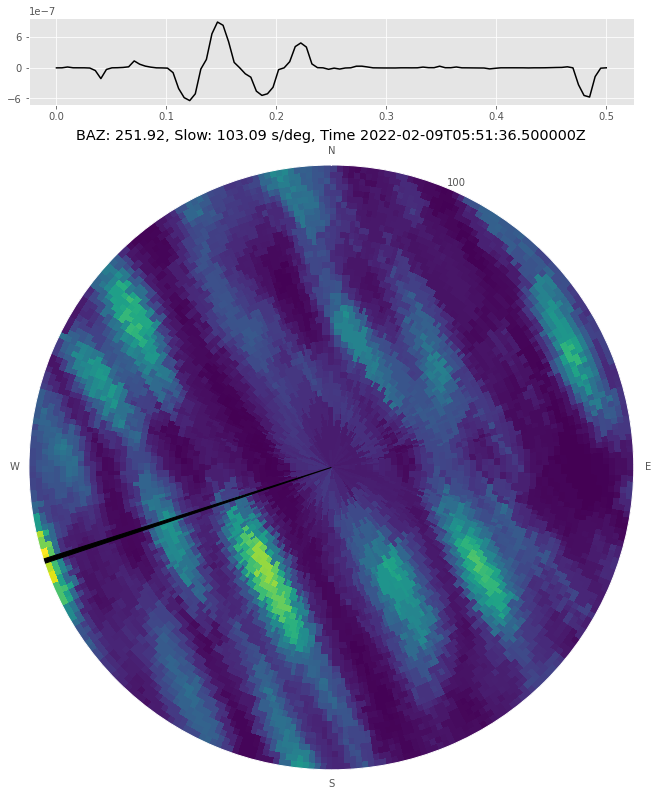

2022-02-09T05:51:36.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:37.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:37.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


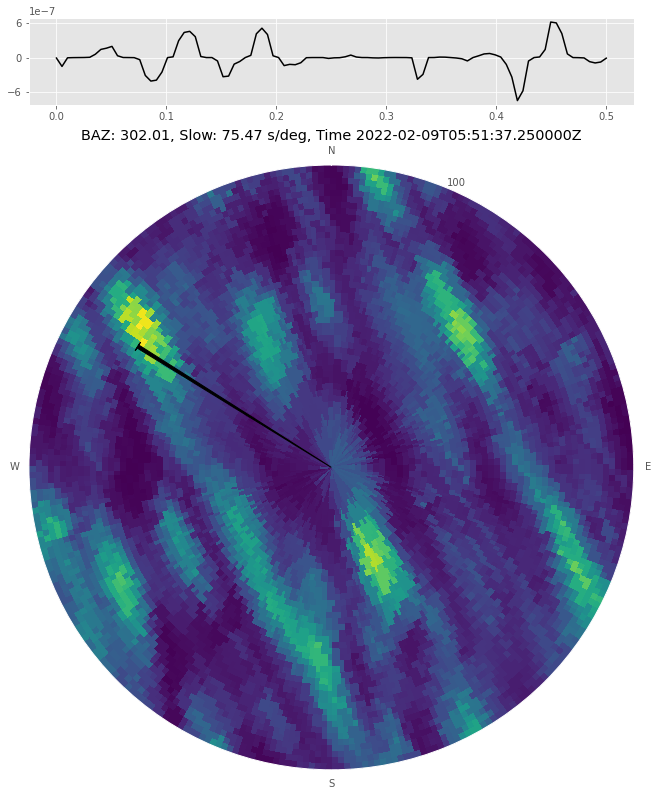

2022-02-09T05:51:37.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


2022-02-09T05:51:37.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


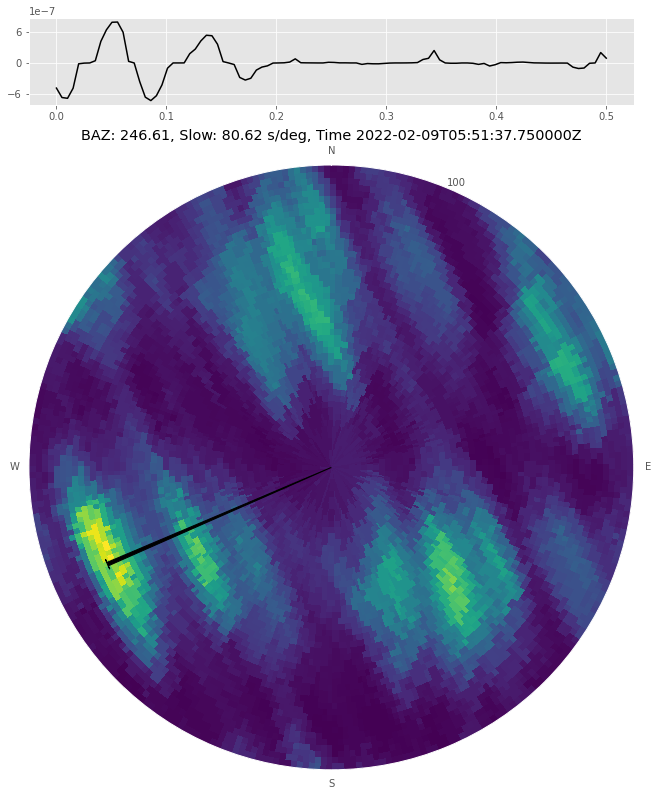

2022-02-09T05:51:38.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


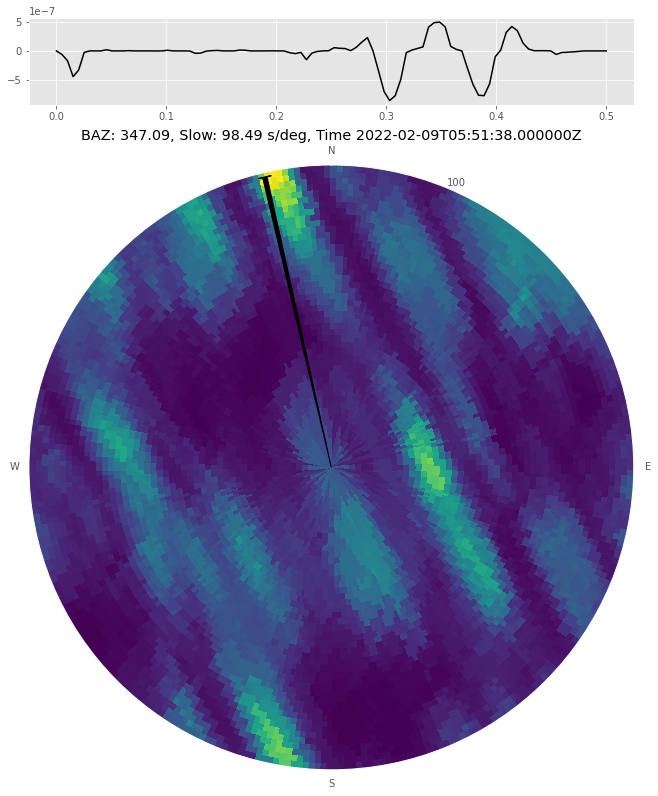

2022-02-09T05:51:38.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


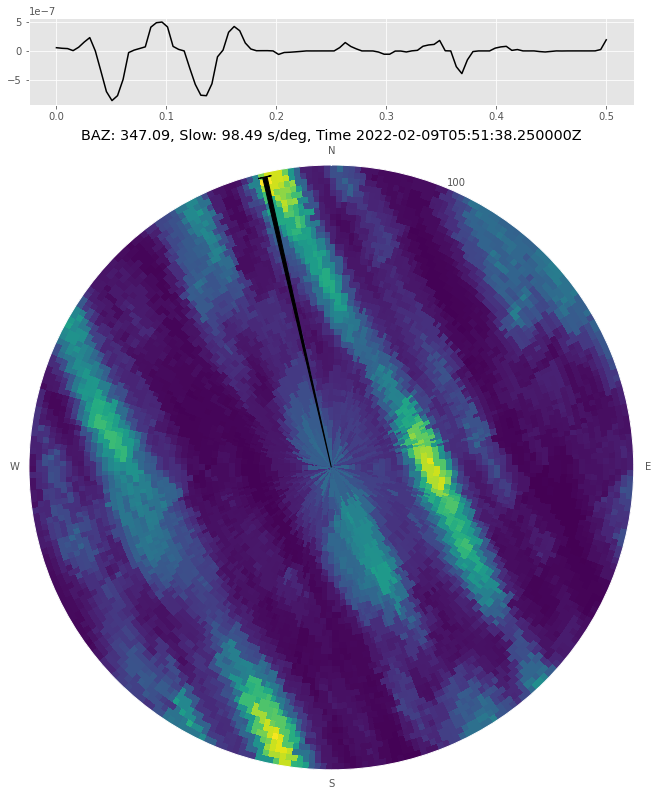

2022-02-09T05:51:38.500000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


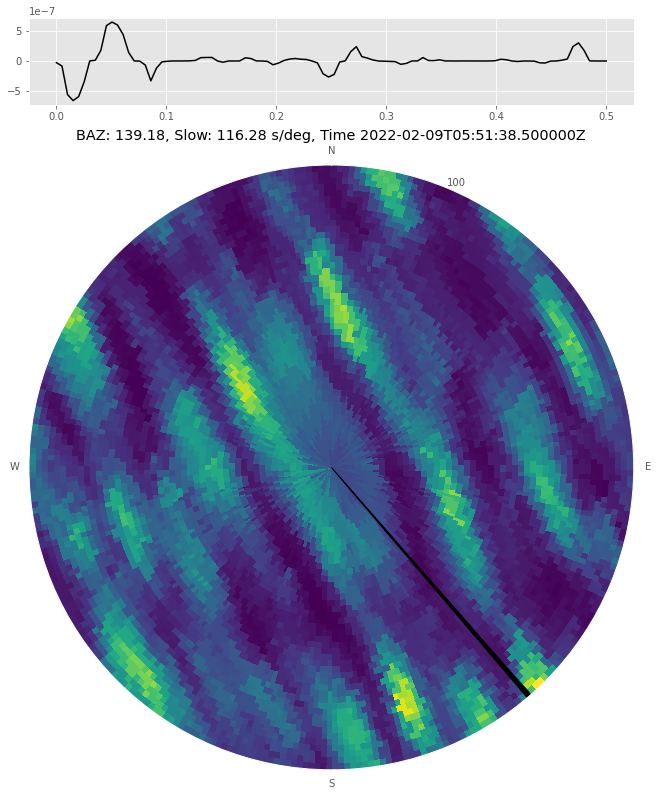

2022-02-09T05:51:38.750000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


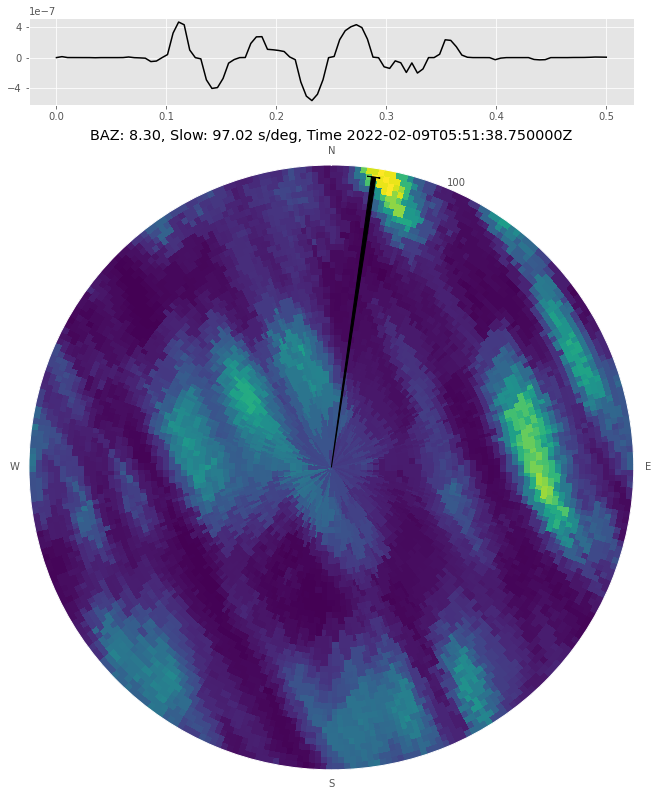

2022-02-09T05:51:39.000000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


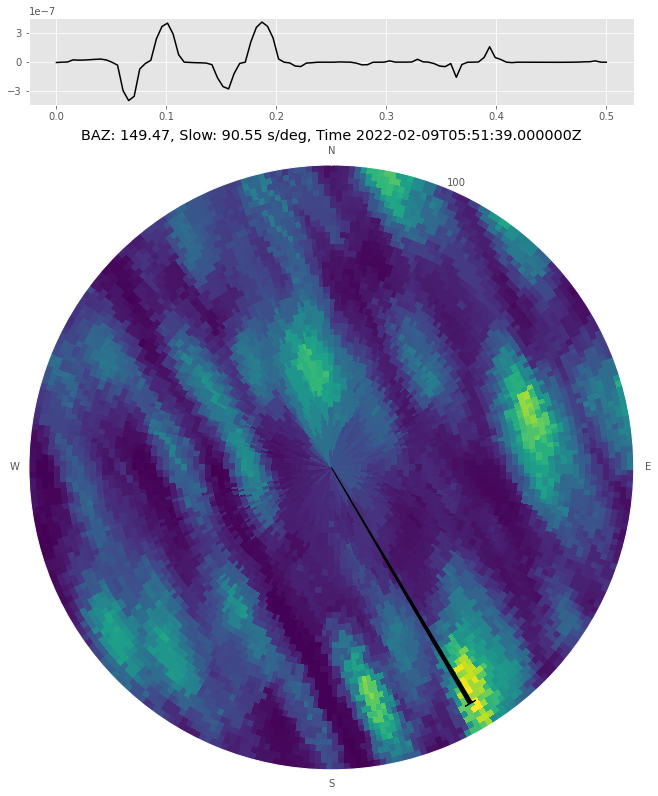

2022-02-09T05:51:39.250000Z


/Users/jowa/local/obspy_arraytools/obspy_arraytools/beamforming_result.py:160: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.radians(grid_x), grid_y, grid, cmap=cmap)


Beamforming results created with DLS method.
	Based on Inventory with 1 Network(s), 5 Stations and 5 Channels.
	Input parameters: 
		 Slowness Range:                     0.0 to 140.0
		 Start Time:                         2022-02-09T05:51:30.000000Z
		 End Time:                           2022-02-09T05:51:39.499999Z
		 Number of Windows:                  38
		 Distance between Window-Starttimes: 0.249999761581

	 Results: 
		 #Window|     Baz|Slowness|Max Abs P|Max Rel P
 		       0|  338.20|   96.93|  7.3e-02|    0.07
 		       1|  356.63|   34.06|  9.5e-02|    0.10
 		       2|  293.50|   50.16|  9.0e-02|    0.09
 		       3|  242.24|   85.88|  1.1e-01|    0.11
 		       4|  345.96|   49.48|  3.1e-01|    0.31
 		       5|  345.96|   49.48|  1.5e-01|    0.15
 		       6|  315.00|   96.17|  8.4e-02|    0.08
 		       7|  148.39|   30.53|  1.5e-01|    0.15
 		       8|  148.39|   30.53|  1.7e-01|    0.17
 		       9|  148.39|   30.53|  1.9e-01|    0.19
 		      10|  152.53|  112.71|  1.9

In [13]:



print ('Center of Gravity:')
print (d.center_of_gravity)


#out = d.fk_analysis(vertical_components, 10, 30., prefilter=True, static3d=True,
#                    array_response=True,vel_corr=2.3, wlen=-0.5, wfrac=0.1, slx=(-100, 100),
#                            sly=(-100, 100), sls=2, plots=('slowness_baz'))

#  strange result if you do sliding window analysis; unclear what is plotted in the trace panel; array_trrans with alpha
#
print(d.delay_and_sum(vertical_components, 10, 30, prefilter=True, static3d=False, 
                      array_response=False,vel_corr=2.3, wlen=0.5,wfrac=0.8,slx=(-100, 100),
                         sly=(-100, 100), sls=2, plots=('slowness_baz')))
#print(d.slowness_whitened_power(vertical_components, 10, 20., prefilter=True, static3d=False, 
#                           array_response=False,vel_corr=4.8, wlen=1,wfrac=0.8,slx=(-100, 100),
#                           sly=(-100, 100), sls=5, plots=('slowness_xy')))
#print(d.capon_estimator(vertical_components, 1, 20., prefilter=True, static3d=True,vel_corr=2.3, 
#                           array_response=False, wlen=-1, wfrac=0.8, slx=(-100, 100),
#                        sly=(-100, 100), sls=5, plots=('slowness_baz')))



In [ ]:
out.plot_bf_results_over_time()

In [ ]:
times = ['win_starttimes','max_pow_baz']
for i in dir(out):
    print(i)


### 6) Display array response function in fk and sloaz display

Here we introduce the concept of array response function. The array response function depends on the array configuration and signal frequency.  The best examples are usually Yellowknife data since the ARF is a cross (like the array) and can be recognised very well in the fk plot.

Perform fk analysis for the Yellowknife array. Use default slowness values (you will need to use array_transfer_helper and array_analysis_helper (with baz_plot=False)).

In [ ]:
SeismicArray._array_transff_helper?

In [ ]:
%matplotlib inline
from obspy_arraytools import SeismicArray
from obspy_arraytools import beamforming_result
from obspy import read, UTCDateTime, read_events, read_inventory
st = read('./01_GRSN_GRF/01.mseed')


vertical_components = st.select(component="Z")
t1 = UTCDateTime(2012, 8, 14, 3, 6, 30)
t2 = UTCDateTime(2012, 8, 14, 3, 9, 0)
vertical_components.trim(t1, t2) 
inv = read_inventory('./01_GRSN_GRF/01.xml')

print( 'Center of Gravity:')
z = SeismicArray('', inv) 
#z.plot()
print (z.center_of_gravity)

z.plot_transfer_function_freqslowness(slim=10, sstep=0.5, freq_min=0.1, freq_max=1, freq_step=0.1)
z.plot()
#ff = z._array_transff_helper(plim=10, pstep=0.5, param='slowness', fmin=0.1, fmax=4, fstep=0.1)
#SeismicArray._plot_transff_helper(ff, lim=10, step=0.5)
#print (z.fk_analysis(vertical_components, frqlow=0.1, frqhigh=4, prefilter=True, static3d=False, vel_corr=4.8, wlen=-1, wfrac=0.8, slx=(-10, 10), sly=(-10, 10), sls=0.5, plots=('slowness_xy')))



### 7) FK analysis (Frequency-Wavenumber analysis)
#### 7a) perform fk analysis for P-wave

Use the GRF array data only, fk can usually only be done for small time windows to avoid interfering phases. For the GRF data, chose a time window of absolute time 17-dec-9_6:49:55 to 6:50:02).  Try different slowness ranges to find a fitting slowness range (from 0 to 12s/deg). 

In [ ]:
from obspy import read, UTCDateTime, read_events, read_inventory
from obspy_arraytools import SeismicArray
st = read('./01_GRSN_GRF/01.mseed')

vertical_components = st.select(component="Z")
t1 = UTCDateTime(1991, 12, 17, 6, 49, 55)
t2 = UTCDateTime(1991, 12, 17, 6, 50, 0)

vertical_components.trim(t1, t2) 
print(vertical_components)

ev = read_events("01_GRSN_GRF/01.qml")[0]
inv = read_inventory("01_GRSN_GRF/01.xml")

print ('Center of Gravity:')
a = SeismicArray('', inv) 
print(a.center_of_gravity)
a.inventory_cull(vertical_components)

a.fk_analysis(vertical_components, frqlow=0.1, frqhigh=4, prefilter=True, static3d=False, array_response=False,vel_corr=4.8, wlen=-1, wfrac=1, slx=(-2.5,2.5),
                               sly=(-2.5,2.5), sls=0.1,
                               plots=('slowness_baz'))


#### 7b) perform fk-analysis for PdP wave

To see the difference to the P-wave, the secondary arrival (it is PdP, the reflection off the D" discontinuity) can be analysed with the fk-analysis: chose a time window from 17-dec-9_6:50:01 to 6:50:06. The slowness range should be as before (in the range of 0-12 s/deg). The slowness values for PdP are smaller (while the backazimuth is very similar to the P wave) and therefore cannot be a depth phase or Moho multiple. If projecting the PdP wave back with the measured slowness, it turns out to be reflected off the D" discontinuity.



In [ ]:

from obspy import read, UTCDateTime, read_events, read_inventory
from obspy_arraytools import SeismicArray
st = read('./01_GRSN_GRF/01.mseed')

vertical_components = st.select(component="Z")
t1 = UTCDateTime(1991, 12, 17, 6, 50, 1)
t2 = UTCDateTime(1991, 12, 17, 6, 50, 6)
vertical_components.trim(t1, t2) 

cat = read_events("./01_GRSN_GRF/01.qml")
ev = cat[0]
inv = read_inventory("./01_GRSN_GRF/01.xml", format='STATIONXML')

print('Center of Gravity:')
array = SeismicArray('', inv) 
print (array.center_of_gravity)

a = SeismicArray('', inv)
#a.plot()
a.delay_and_sum(vertical_components, 0.1, 4, prefilter=True, static3d=False, array_response=True,vel_corr=4.8, wlen=-1, wfrac=0.1, slx=(-10, 10),sly=(-10,10), sls=0.1,plots=('slowness_baz'))

You can try different times windows as well and see whether you can see PcP as well!

In [ ]:
plt.show()